<a href="https://colab.research.google.com/github/SJP0308/MLTUTORIAL/blob/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic - Machine Learning from Disaster**

# **문제 정의**

**'what sorts of people were more likely to survive?'** using passenger data (ie name, age, gender, socio-economic class, etc)

# **데이터셋 다운로드**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# matplotlib의 플롯 스타일을 'seaborn'으로 설정
plt.style.use('seaborn')
# 시각화에서 폰트 크기를 2.5배로 설정
sns.set(font_scale=2.5)

import warnings
# 경고 메시지를 무시하도록 설정
warnings.filterwarnings('ignore')

# 플롯을 인라인으로 표시하도록 설정
%matplotlib inline

<ipython-input-1-4ec03486a73e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from google.colab import drive
drive.mount('/content/drive')
train_data = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/titanic/test.csv')

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **EDA (Exploratory Data Analysis)**

## **데이터 구조, 통계적 요약**

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **결측치 확인**

<Axes: >

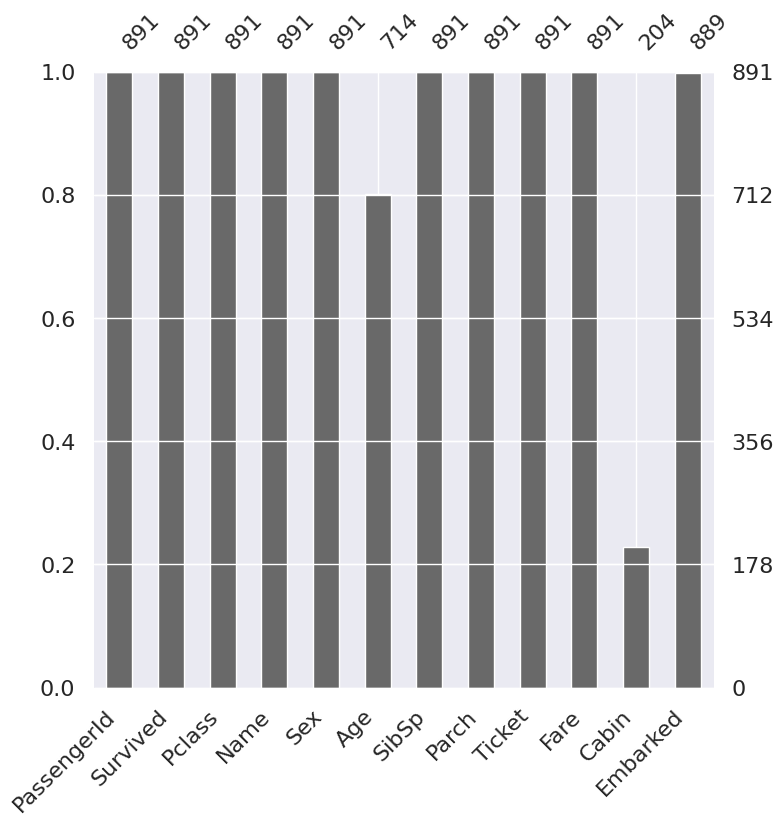

In [7]:
import missingno as msno

msno.bar(df=train_df.iloc[:, :], figsize=(8, 8))

In [8]:
for col in train_df.columns:
  per = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(train_df[col].isnull().mean()))
  print(per)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in test_df.columns:
  per = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(test_df[col].isnull().mean()))
  print(per)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


## **이상치 확인**

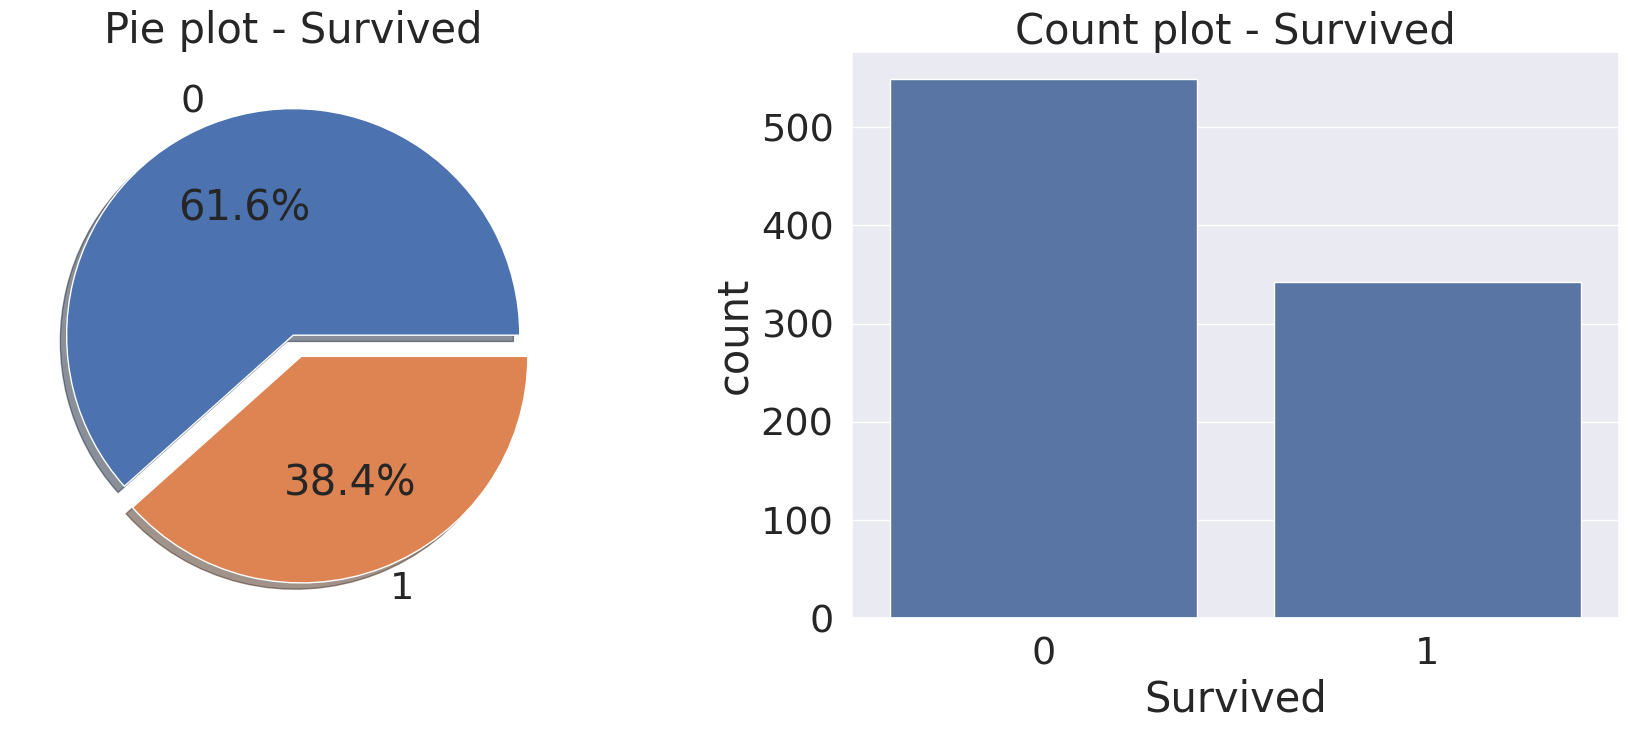

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

train_df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=axes[0],
    shadow=True)
axes[0].set(title='Pie plot - Survived', ylabel='')

sns.countplot(x='Survived', data=train_df, ax=axes[1])
axes[1].set_title('Count plot - Survived')

plt.tight_layout()

## **데이터 패턴 탐색**

### **Pclass**

In [11]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

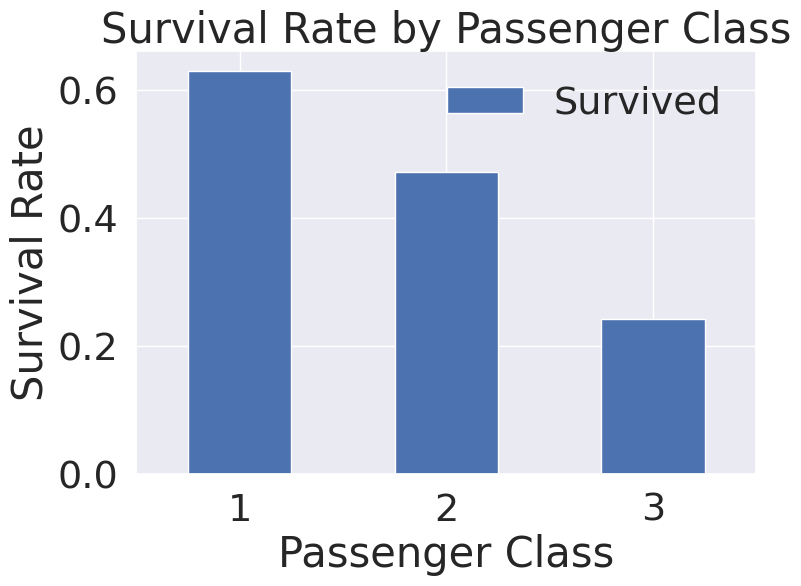

In [12]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

### **Name**

In [13]:
import re

def extract_initial(name):
    match = re.search(r'^(.*?), (.*?)\.(.*)$', name)
    return match.group(2) if match else None

train_df['Initial'] = train_df['Name'].apply(extract_initial)
test_df['Initial'] = test_df['Name'].apply(extract_initial)

In [14]:
initial_mapping = {
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Dr': 'Mr',
    'Major': 'Mr',
    'Lady': 'Mrs',
    'the Countess': 'Mrs',
    'Jonkheer': 'Mr',
    'Col': 'Mr',
    'Rev': 'Mr',
    'Capt': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    'Dona': 'Mrs'
}

train_df['Initial'].replace(initial_mapping, inplace=True)
test_df['Initial'].replace(initial_mapping, inplace=True)

In [15]:
pd.crosstab(train_df['Initial'], train_df['Survived'], margins=True)

Survived,0,1,All
Initial,,,
Master,17,23,40
Miss,55,130,185
Mr,451,87,538
Mrs,26,102,128
All,549,342,891


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mrs'),
  Text(1, 0, 'Mr'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master')])

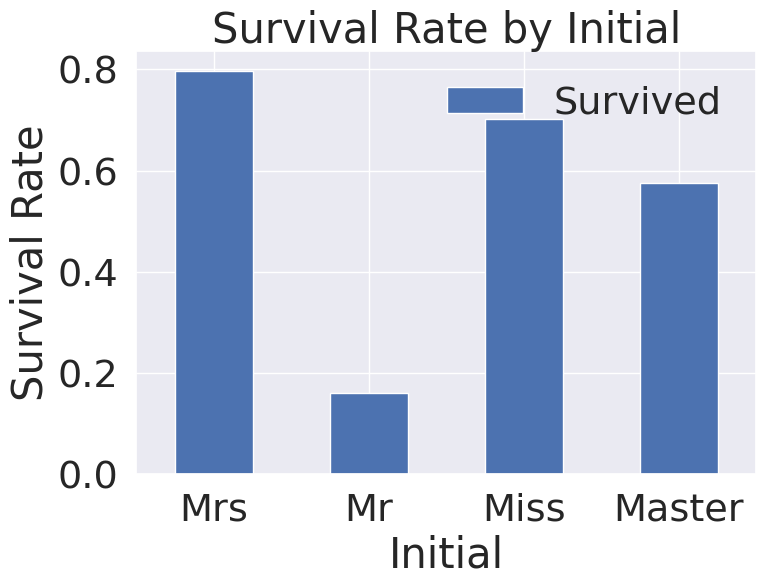

In [16]:
train_df[['Initial', 'Survived']].groupby(['Initial'], as_index=True).mean().sort_values(by='Initial', ascending=False).plot.bar()
plt.title('Survival Rate by Initial')
plt.xlabel('Initial')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

### **Sex**

In [17]:
pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

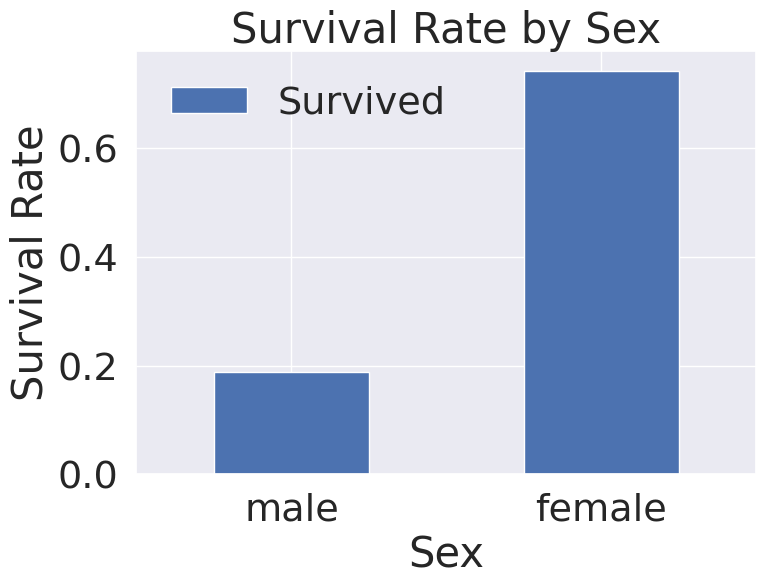

In [18]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Sex', ascending=False).plot.bar()
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

### **Age**

In [19]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr


In [20]:
train_df[['Initial', 'Age']].groupby('Initial').mean()

,Age
Initial,
Master,4.574167
Miss,21.845638
Mr,33.022727
Mrs,35.873874


In [21]:
def fill_age_with_mean(age, initial):
    if pd.isnull(age):
        if initial == 'Master':
            return 4
        elif initial == 'Miss':
            return 21
        elif initial == 'Mr':
            return 33
        elif initial == 'Mrs':
            return 35
    return age

def extract_age_group(age):
    if pd.notnull(age):
        return int((age-0.01)//10)

train_df['Age'] = train_df.apply(lambda row: fill_age_with_mean(row['Age'], row['Initial']), axis=1)
train_df['AgeGroup'] = train_df['Age'].apply(extract_age_group)

test_df['Age'] = test_df.apply(lambda row: fill_age_with_mean(row['Age'], row['Initial']), axis=1)
test_df['AgeGroup'] = test_df['Age'].apply(extract_age_group)

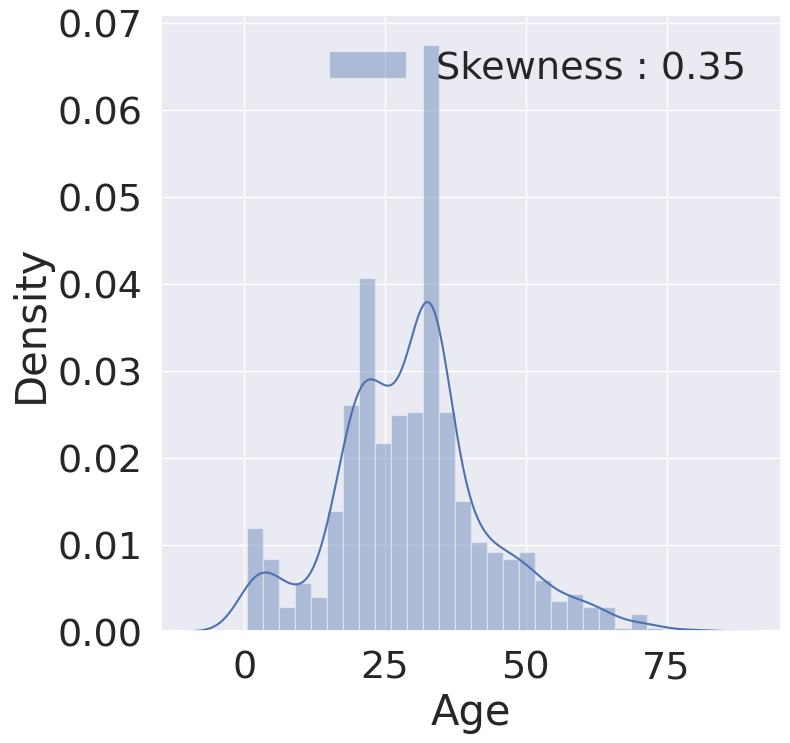

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df['Age'], label='Skewness : {:.2f}'.format(train_df['Age'].skew()), ax=ax)
g = g.legend(loc='best')

In [23]:
pd.crosstab(train_df['AgeGroup'], train_df['Survived'], margins=True)

Survived,0,1,All
AgeGroup,,,
0,28,40,68
1,71,44,115
2,160,106,266
3,195,97,292
4,53,33,86
5,25,17,42
6,13,4,17
7,4,1,5
All,549,342,891


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '7'),
  Text(1, 0, '6'),
  Text(2, 0, '5'),
  Text(3, 0, '4'),
  Text(4, 0, '3'),
  Text(5, 0, '2'),
  Text(6, 0, '1'),
  Text(7, 0, '0')])

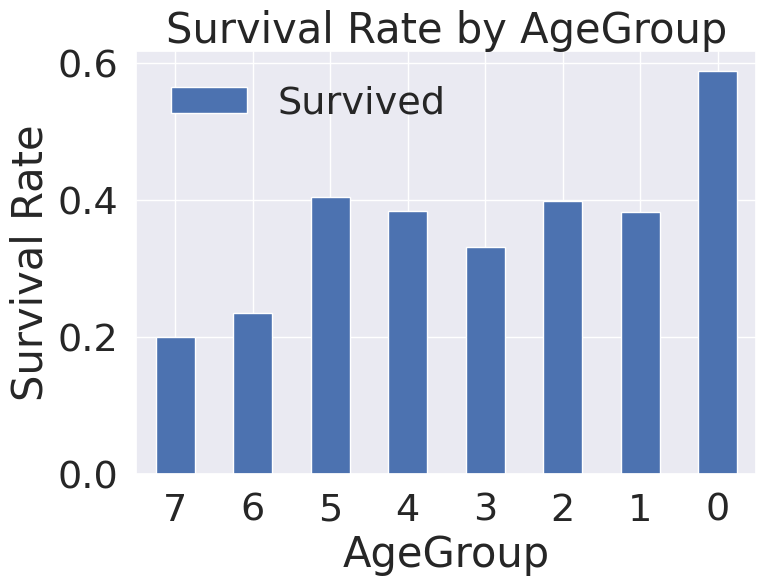

In [24]:
train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=True).mean().sort_values(by='AgeGroup', ascending=False).plot.bar()
plt.title('Survival Rate by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

### **Familysize**

In [25]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [26]:
pd.crosstab(train_df['FamilySize'], train_df['Survived'], margins=True)

Survived,0,1,All
FamilySize,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '11'),
  Text(1, 0, '8'),
  Text(2, 0, '7'),
  Text(3, 0, '6'),
  Text(4, 0, '5'),
  Text(5, 0, '4'),
  Text(6, 0, '3'),
  Text(7, 0, '2'),
  Text(8, 0, '1')])

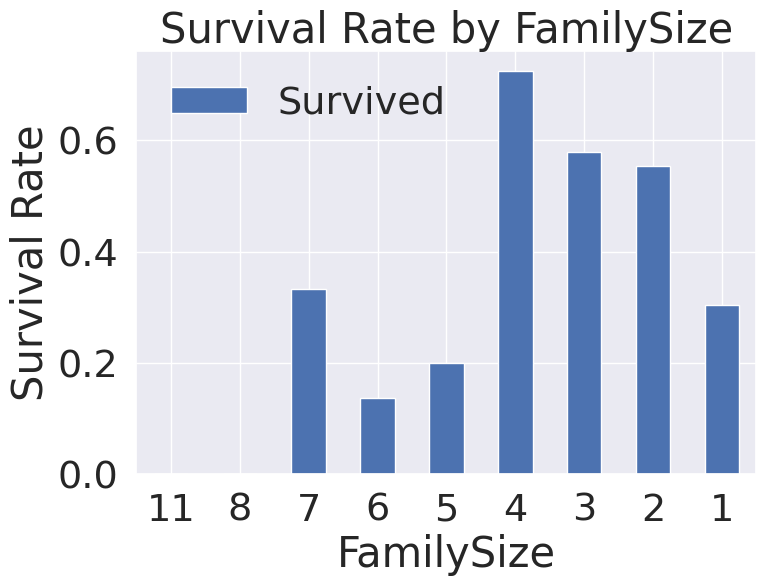

In [27]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='FamilySize', ascending=False).plot.bar()
plt.title('Survival Rate by FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

### **Ticket**

In [28]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


### **Fare**

In [29]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,AgeGroup,FamilySize
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,6,1


In [30]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

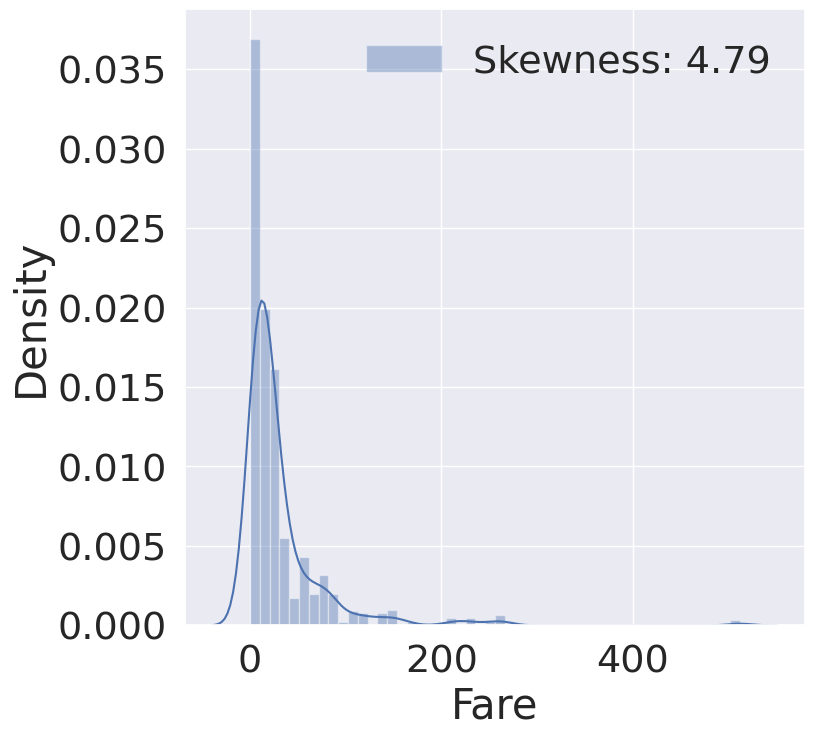

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df['Fare'], label='Skewness: {:.2f}'.format(train_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

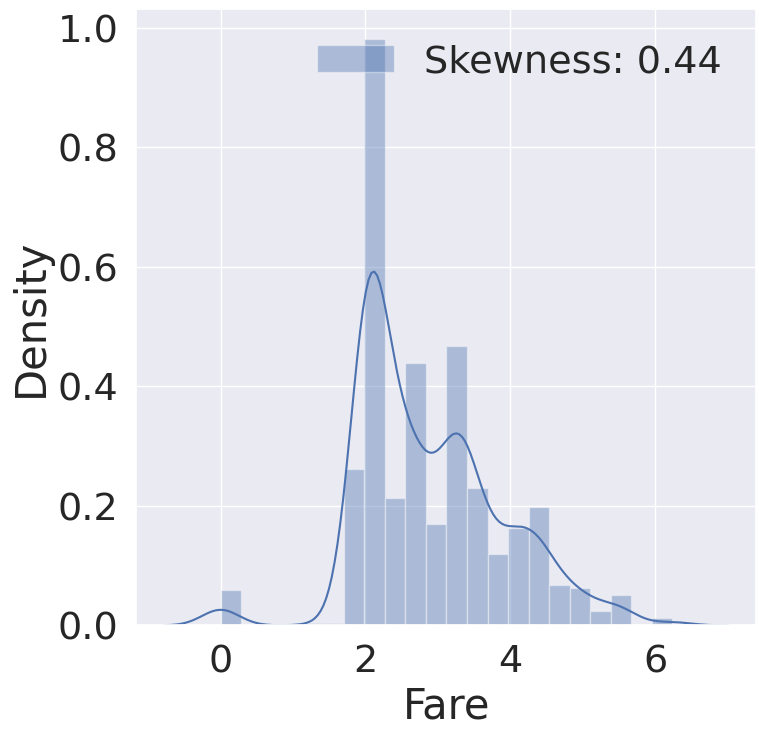

In [32]:
train_df['Fare'] = np.where(train_df['Fare'] > 0, np.log(train_df['Fare']), 0)
test_df['Fare'] = np.where(test_df['Fare'] > 0, np.log(test_df['Fare']), 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_df['Fare'], label='Skewness: {:.2f}'.format(train_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### **Cabin**

In [33]:
train_df[train_df['Cabin'].isnull()].shape[0]/train_df.shape[0]

0.7710437710437711

### **Embarked**

In [34]:
train_df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [35]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,AgeGroup,FamilySize
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN,Miss,3,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN,Mrs,6,1


In [36]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

In [37]:
pd.crosstab(train_df['Embarked'], train_df['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'Q'), Text(2, 0, 'C')])

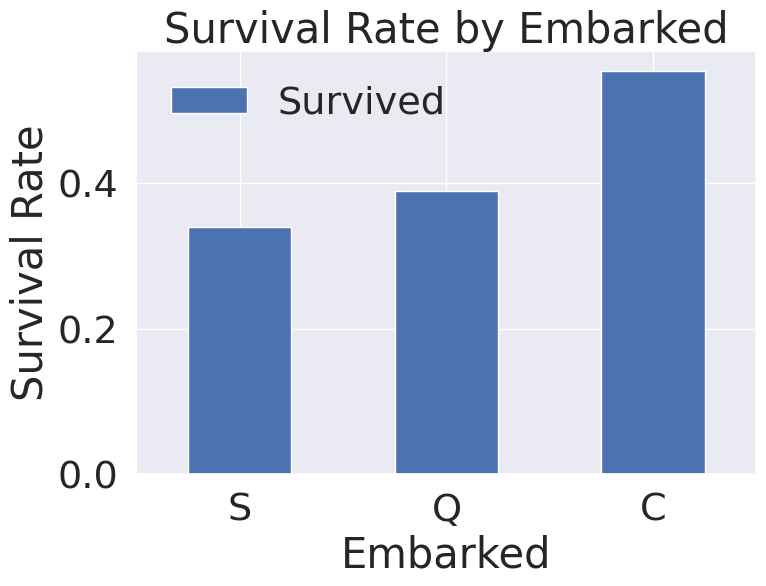

In [38]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Embarked', ascending=False).plot.bar()
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# **특성 공학**

In [39]:
train_df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [40]:
print(train_df.columns)
print(test_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Initial', 'AgeGroup',
       'FamilySize'],
      dtype='object')
Index(['Pclass', 'Sex', 'Fare', 'Embarked', 'Initial', 'AgeGroup',
       'FamilySize'],
      dtype='object')


## **결측값 채우기**

In [41]:
train_df.isnull().any()

,0
Survived,False
Pclass,False
Sex,False
Fare,False
Embarked,False
Initial,False
AgeGroup,False
FamilySize,False


In [42]:
test_df.isnull().any()

,0
Pclass,False
Sex,False
Fare,False
Embarked,False
Initial,False
AgeGroup,False
FamilySize,False


## **원-핫 인코딩**

In [43]:
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

train_df['Initial'] = train_df['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3})
test_df['Initial'] = test_df['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3})

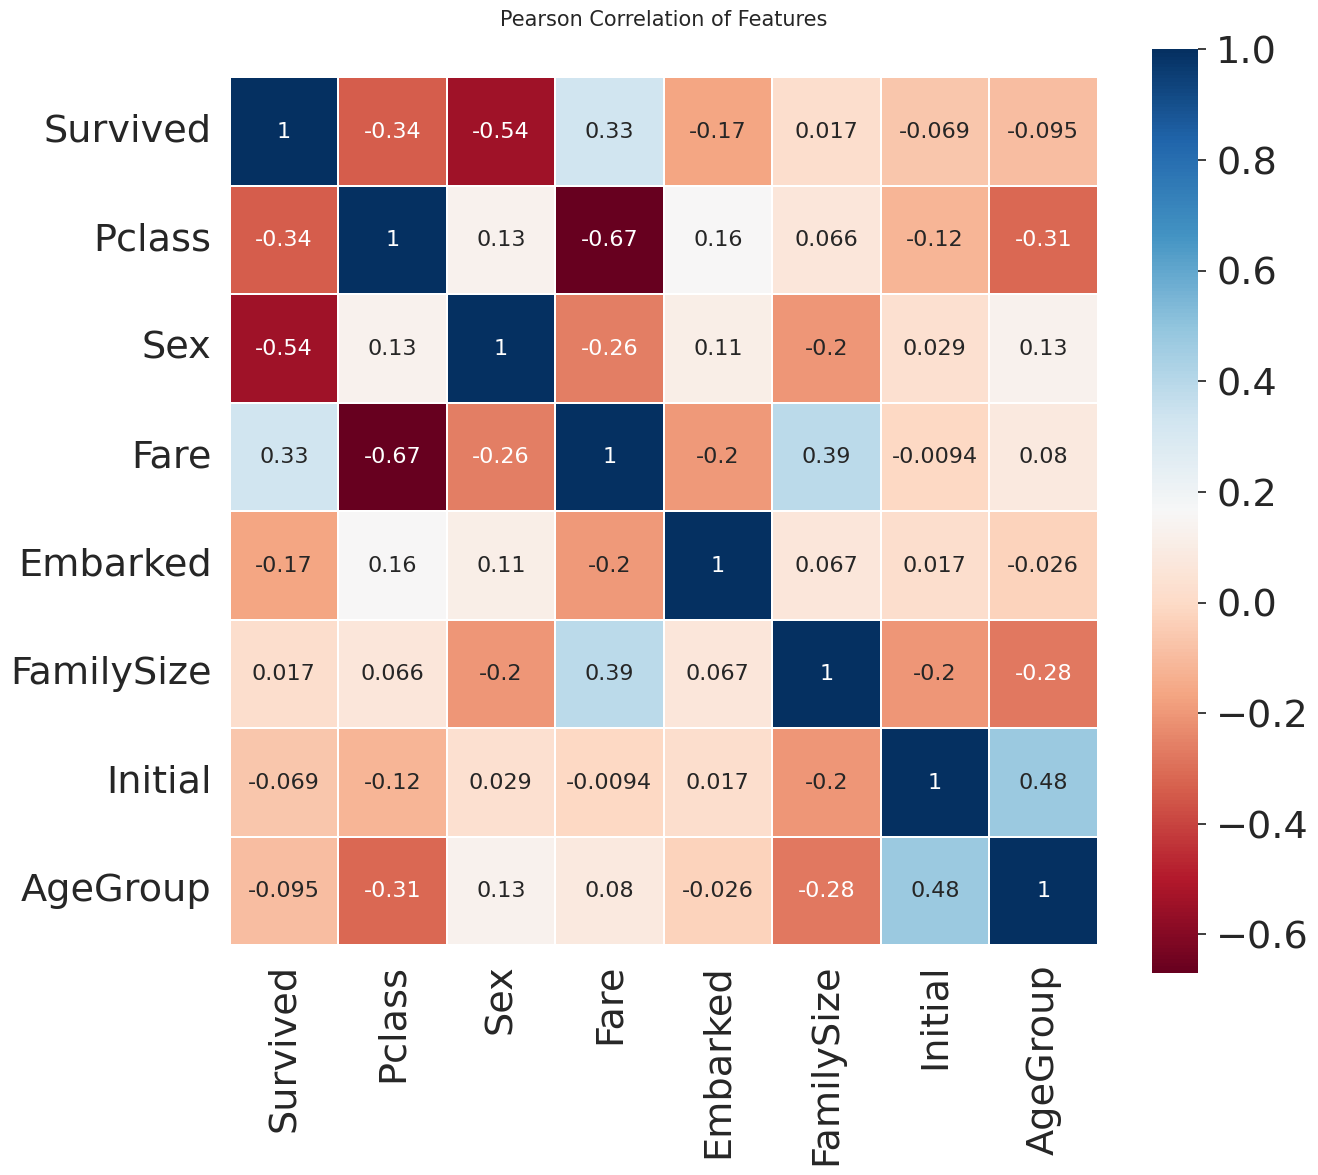

In [44]:
heatmap_data = train_df[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'AgeGroup']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [45]:
for column in ['Pclass', 'Initial', 'Sex', 'AgeGroup', 'FamilySize','Embarked']:
  train_df = pd.get_dummies(train_df, columns=[column], prefix=column)
  test_df = pd.get_dummies(test_df, columns=[column], prefix=column)

# **모델 선택 및 학습**

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train = train_df.drop('Survived', axis=1).values
target_label = train_df['Survived'].values
X_test = test_df.values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2024)

model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_tr, y_tr)

best_params = grid_search.best_params_
print(best_params)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_vld, y_vld)
print("Validation Accuracy: {:.2f}".format(accuracy))

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Validation Accuracy: 0.82


# **특성 중요도**

Text(0, 0.5, 'Feature')

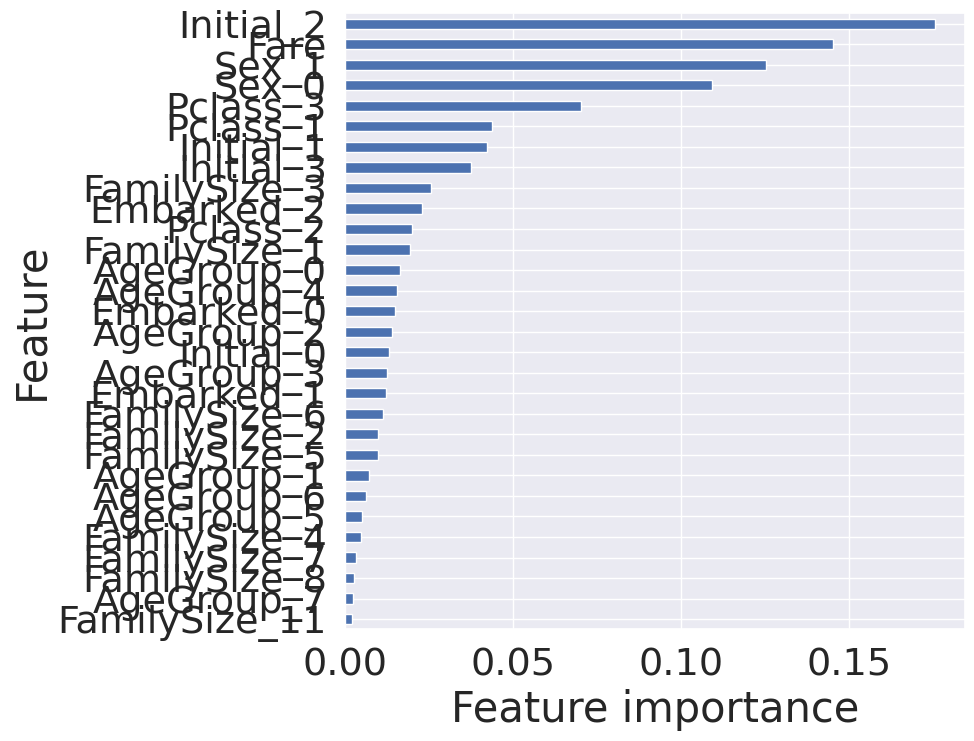

In [47]:
from pandas import Series

feature_importance = best_model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_df.columns)
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')

# **테스트 세트 예측**

In [48]:
submission = pd.read_csv('/content/drive/My Drive/titanic/gender_submission.csv')
prediction = best_model.predict(X_test)
submission['Survived'] = prediction
submission.to_csv('./titanicanswer.csv', index=False)